<a href="https://colab.research.google.com/github/albivaltzew/urbancode_samolet/blob/main/Part2_urbancode_matrix_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


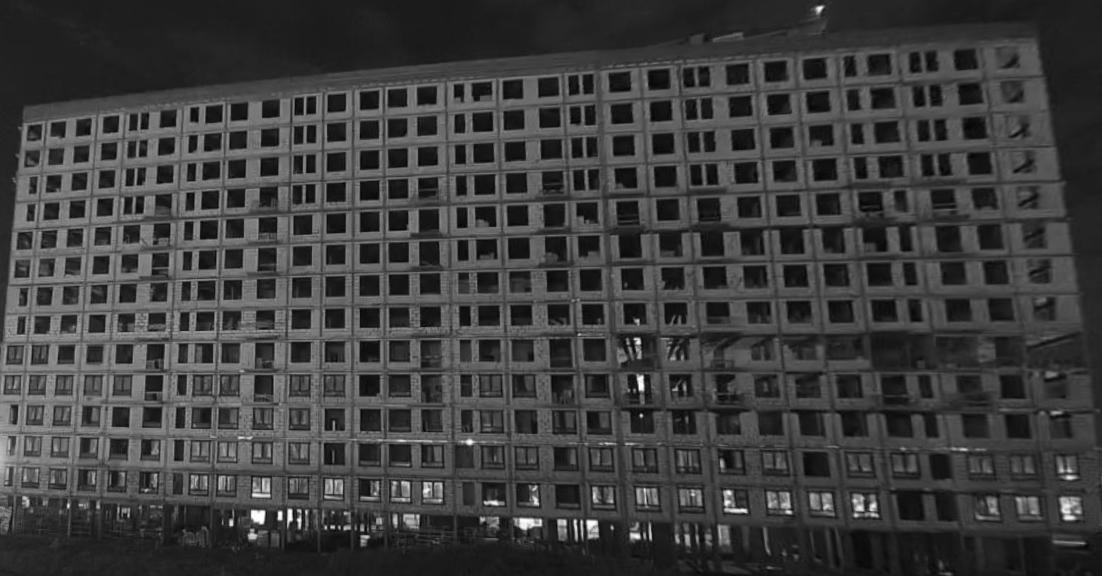

In [ ]:
img = cv2.imread('/content/drive/MyDrive/urbanhack-train/images_clean/0000000111building.jpg')
cv2_imshow(img)

# визуалицая yolo

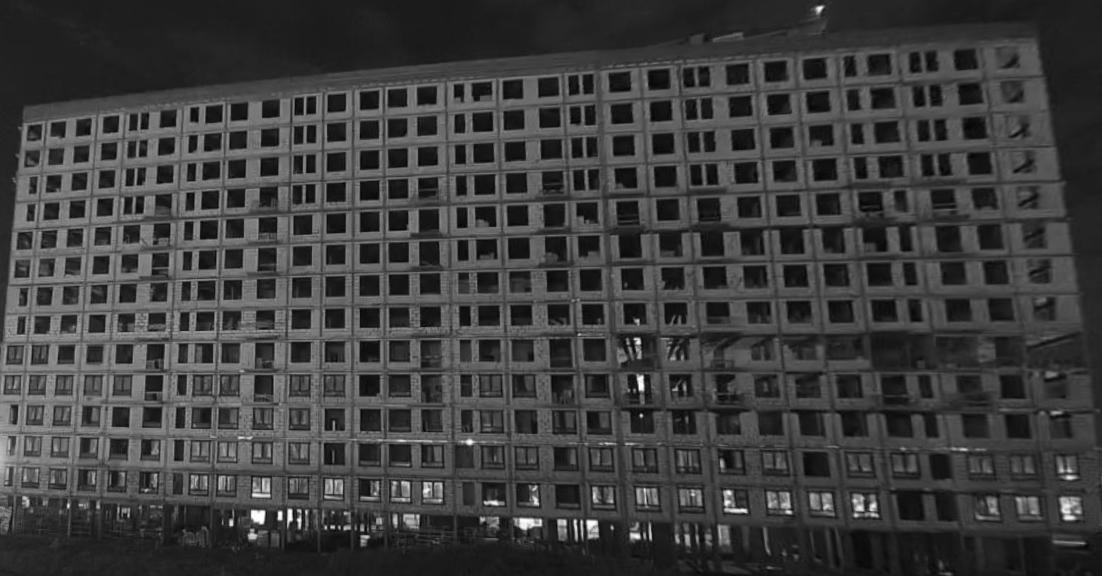

In [ ]:
img = cv2.imread("/content/drive/MyDrive/urbanhack-train/images_clean/0000000111building.jpg")
cv2_imshow(img)

In [ ]:
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/urbanhack-train/labels_clean/0000000111building.txt') as f:
    lines = f.readlines()

In [ ]:
bboxes = []
for line in lines:
  print(line.split()[:])
  line = np.array(line.split()[:])
  bboxes.append(line)

['2', '0.6334392', '0.1352864', '0.0338112', '0.0541493']
['2', '0.3762341', '0.3277604', '0.0558802', '0.0503472']
['2', '0.3778448', '0.4381857', '0.057196', '0.0510243']
['2', '0.4317921', '0.433151', '0.045254', '0.0533159']
['2', '0.3757667', '0.1720572', '0.0557259', '0.0490798']
['2', '0.8543012', '0.1120399', '0.0750635', '0.0634201']
['0', '0.1722368', '0.7857465', '0.0433847', '0.0517013']
['1', '0.6658892', '0.9393923', '0.0344646', '0.063125']
['2', '0.334637', '0.4961371', '0.0273321', '0.0511979']
['2', '0.0593148', '0.3212673', '0.045617', '0.048368']
['2', '0.7893829', '0.1747309', '0.0604355', '0.0603645']
['0', '0.9119283', '0.8909809', '0.0777767', '0.0684895']
['2', '0.7428312', '0.1785243', '0.0355353', '0.060243']
['2', '0.2299047', '0.3977604', '0.0605172', '0.049618']
['2', '0.4966379', '0.1513888', '0.0297005', '0.0527083']
['2', '0.3354809', '0.6114583', '0.0283121', '0.0562499']
['0', '0.2734528', '0.7310937', '0.0287205', '0.0566319']
['2', '0.7677949', '0.6

In [ ]:
width, height = img.shape[1], img.shape[0]

In [ ]:
width

1102

In [ ]:
height

576

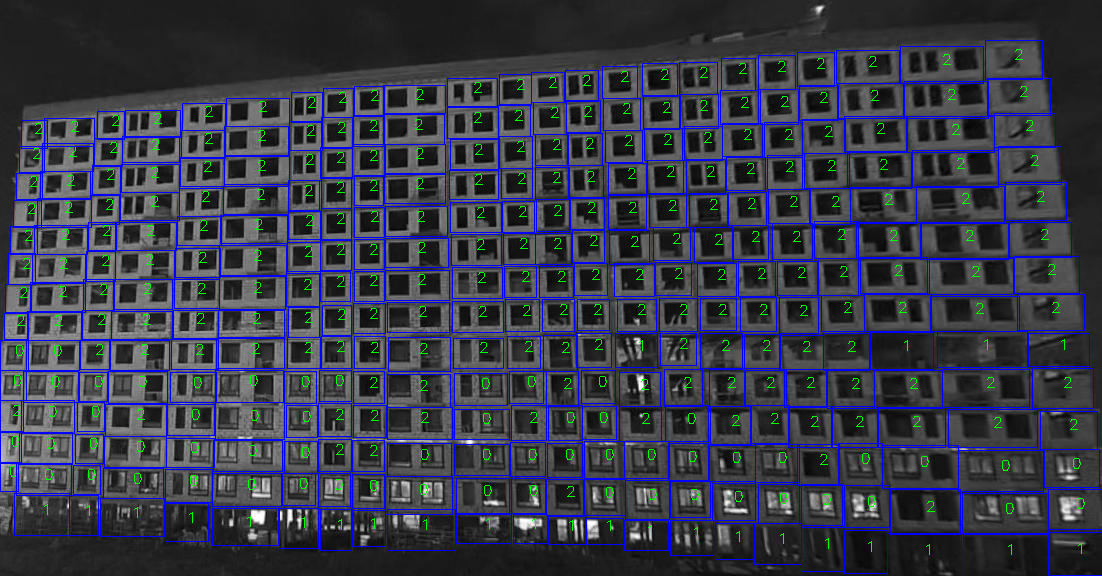

In [ ]:
# Define the text and font settings
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 255,0)  # White color
font_thickness = 1

image = img.copy()
for bbox in bboxes:
  cls = int(bbox[0])
  x_center  = float(bbox[1])*width
  y_center = float(bbox[2])*height
  width_bb = float(bbox[3])*width
  height_bb = float(bbox[4])*height
  start_point = round(x_center-width_bb/2), round(y_center - height_bb/2)
  end_point = round(x_center+width_bb/2), round(y_center + height_bb/2)

  center_point = (int(x_center), int(y_center))

  cv2.rectangle(image, start_point, end_point, color = (255, 0, 0),   thickness=1)
  # Put text on the rectangle
  text_size, _ = cv2.getTextSize(bbox[0], font, font_scale, font_thickness)
  # text_x = (x1 + x2 - text_size[0]) // 2  # Center the text horizontally
  # text_y = (y1 + y2 + text_size[1]) // 2  # Center the text vertically
  cv2.putText(image, bbox[0], center_point, font, font_scale, font_color, font_thickness)

cv2_imshow(image)

In [ ]:
bboxes = []
for line in lines:
  print(line.split()[:])
  line = np.array(line.split()[:])
  bboxes.append(line)

In [ ]:


# Parse YOLO format bounding boxes and convert to floating-point numbers
windows = []
for box in bboxes:
    _, x_center, y_center, width, height = map(float, box)
    windows.append({'x_center': x_center, 'y_center': y_center, 'width': width, 'height': height})

# Sort the windows by their Y-axis (vertical) position
sorted_windows = sorted(windows, key=lambda box: box['y_center'])

# Identify the floors
floors = []
current_floor = []

for box in sorted_windows:
    if not current_floor:
        current_floor.append(box)
    elif box['y_center'] < current_floor[-1]['y_center']:
        floors.append(current_floor)
        current_floor = [box]
    else:
        current_floor.append(box)

floors.append(current_floor)

# Sort the windows by their X-axis (horizontal) position within each floor
for i, floor in enumerate(floors):
    floors[i] = sorted(floor, key=lambda box: box['x_center'])

# Assign coordinates (n, m) to each window
building_matrix = []

for n, floor in enumerate(floors, start=1):
    floor_matrix = []
    for m, window in enumerate(floor, start=1):
        floor_matrix.append((n, m))
    building_matrix.append(floor_matrix)

# Print the building matrix
for row in building_matrix:
    print(row)


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 72), (1, 73), (1, 74), (1, 75), (1, 76), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (1, 100), (1, 101), (1, 102), (1, 103), (1, 104), (1, 105), (1, 106), (1, 107), (1, 108), (1, 109), (1, 110), (1, 111

In [ ]:

# Parse YOLO format data and convert to a list of tuples
boxes = [(int(box[0]), float(box[1]), float(box[2]), float(box[3]), float(box[4])) for box in bboxes]

# Sort the boxes based on their vertical position (from top to bottom)
boxes.sort(key=lambda box: box[2])  # Sorting based on y-coordinate

# Initialize variables to keep track of floors and entrances
current_floor = 1
current_entrance = 1
matrix = {}  # Dictionary to store the matrix

# Iterate through the sorted boxes and assign floor and entrance numbers
for i, box in enumerate(boxes):
    if i > 0:
        # Check if the current box is higher than the previous box, indicating a new floor
        if box[2] < boxes[i - 1][2]:
            current_floor += 1
            current_entrance = 1
        else:
            # Check if the current box is to the right of the previous box, indicating a new entrance
            if box[1] > boxes[i - 1][1]:
                current_entrance += 1

    # Add the box to the matrix with its floor and entrance numbers
    matrix[(current_floor, current_entrance)] = box

# Print the matrix
for (floor, entrance), box in matrix.items():
    print(f"Floor: {floor}, Entrance: {entrance}, Box: {box}")


Floor: 1, Entrance: 1, Box: (2, 0.4285617, 0.1599826, 0.0453266, 0.0496527)
Floor: 1, Entrance: 2, Box: (2, 0.3757667, 0.1720572, 0.0557259, 0.0490798)
Floor: 1, Entrance: 3, Box: (2, 0.3349818, 0.17421, 0.0273139, 0.0512673)
Floor: 1, Entrance: 4, Box: (2, 0.3063793, 0.1785937, 0.0271687, 0.0507291)
Floor: 1, Entrance: 5, Box: (2, 0.2779809, 0.1858333, 0.0287023, 0.0506597)
Floor: 1, Entrance: 6, Box: (2, 0.2338384, 0.1941666, 0.0568239, 0.0481597)
Floor: 1, Entrance: 7, Box: (2, 0.1847776, 0.2021267, 0.0389564, 0.0462673)
Floor: 1, Entrance: 8, Box: (2, 0.100127, 0.2173003, 0.0241742, 0.0480034)
Floor: 1, Entrance: 9, Box: (2, 0.37495, 0.2243315, 0.0553629, 0.0530034)
Floor: 1, Entrance: 10, Box: (2, 0.0627359, 0.2288802, 0.04549, 0.0487326)
Floor: 1, Entrance: 11, Box: (2, 0.3052223, 0.2301302, 0.0278675, 0.0524826)
Floor: 1, Entrance: 12, Box: (2, 0.0307622, 0.2321527, 0.0233938, 0.0492013)
Floor: 1, Entrance: 13, Box: (2, 0.2774364, 0.2357291, 0.0297912, 0.0509722)
Floor: 1, Entra

# Строю распределение Х Y

In [ ]:
with open('/content/drive/MyDrive/urbanhack-train/labels_clean/0000000111building.txt') as f:
    lines = f.readlines()

bboxes = []
for line in lines:
  # print(line.split()[1:])
  line = np.array(line.split()[1:]).astype(float)
  bboxes.append(line)


In [ ]:
windows = []
xcntr = []
ycntr = []
for box in bboxes:
    x_center, y_center, width, height = map(float, box)
    windows.append({'x_center': x_center, 'y_center': y_center, 'width': width, 'height': height})
    xcntr.append(x_center)
    ycntr.append(y_center)

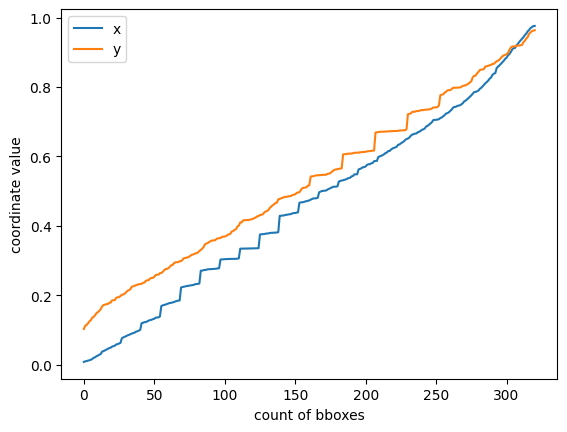

In [ ]:
import matplotlib.pyplot as plt
xcntr.sort()
ycntr.sort()
x = np.arange(len(xcntr))
y = np.arange(len(ycntr))

plt.plot(x, xcntr, label="x")

plt.plot(y, ycntr, label="y")

# Add labels and a title
plt.xlabel('count of bboxes')
plt.ylabel('coordinate value')
# plt.title('Bar Plot of Dictionary Values')
plt.legend()

# Show the plot
plt.show()

# Играемся с графами

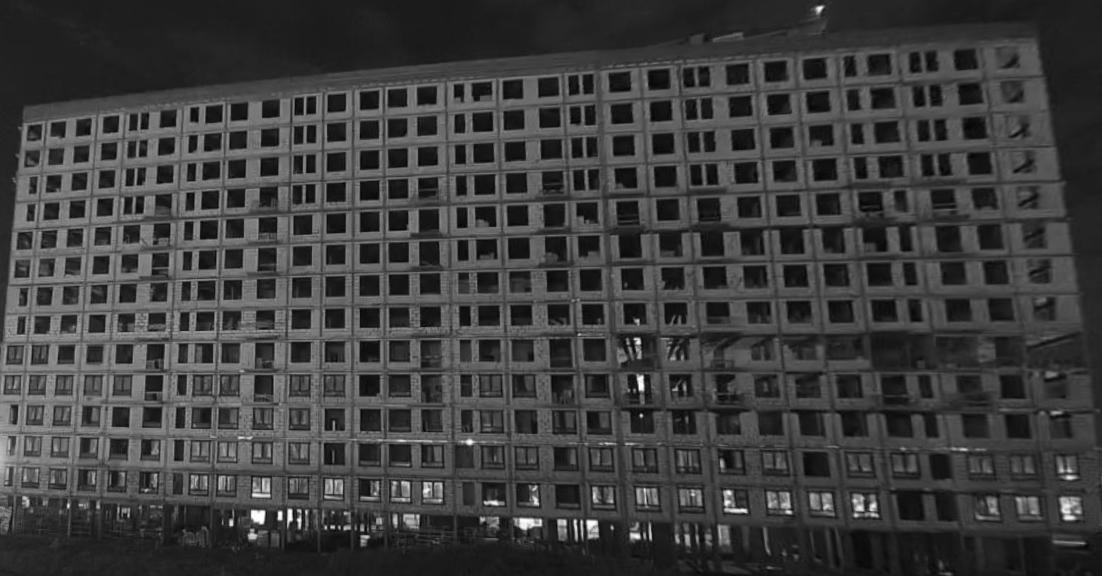

In [ ]:
img = cv2.imread('/content/drive/MyDrive/urbanhack-train/images_clean/0000000111building.jpg')
cv2_imshow(img)

In [ ]:
with open('/content/drive/MyDrive/urbanhack-train/labels_clean/0000000111building.txt') as f:
    lines = f.readlines()

bboxes = []
for line in lines:
  # print(line.split()[1:])
  line = np.array(line.split()[1:]).astype(float)
  bboxes.append(line)


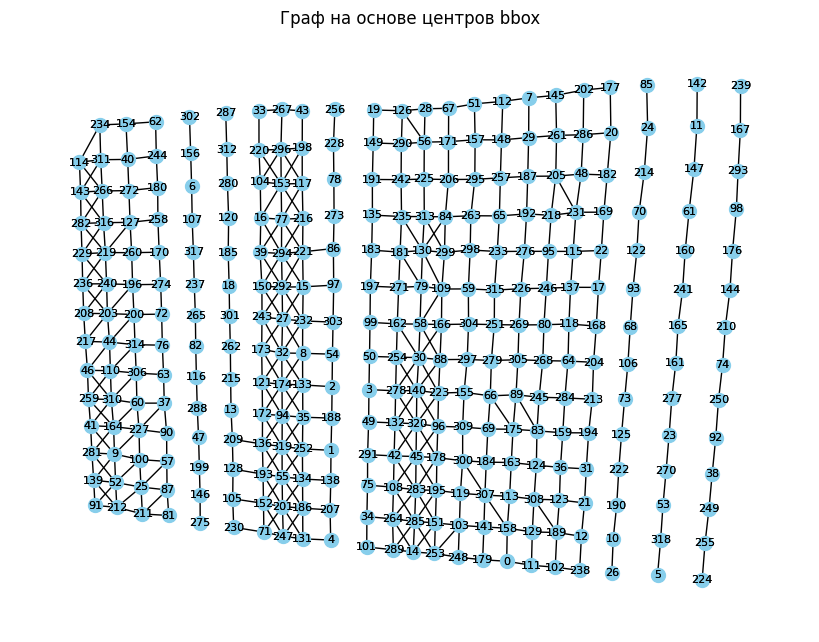

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создайте пустой граф
G = nx.Graph()

# Пример меток bbox в YOLO формате (x_center, y_center, width, height)
yolo_labels = bboxes.copy()

# Преобразуйте метки в координаты центров bbox
image_width, image_height = img.shape[1], img.shape[0]  # Ширина и высота изображения
centres = [(x * image_width, y * image_height) for x, y, _, _ in yolo_labels]

# Создайте вершины в графе
for idx, center in enumerate(centres):
    G.add_node(idx, center=center)

# Определите связи между вершинами (например, на основе расстояния между центрами)
threshold_distance = 50.0  # Пороговое расстояние для связи вершин

for i in range(len(centres)):
    for j in range(i + 1, len(centres)):
        center1 = centres[i]
        center2 = centres[j]
        distance = ((center1[0] - center2[0])**2 + (center1[1] - center2[1])**2)**0.5
        if distance < threshold_distance:
            G.add_edge(i, j)

# Проверьте, что граф G содержит вершины и рёбра перед попыткой поиска MST
if len(G.nodes()) > 0 and len(G.edges()) > 0:
    # Вычисление минимального остовного дерева (MST)
    mst = nx.minimum_spanning_tree(G)

    # Рисование графа
    pos = {node: center for node, center in G.nodes(data='center')}  # Получение позиций вершин

    plt.figure(figsize=(8, 6))  # Создание фигуры для графа
    nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)

    # Опционально: добавление названий вершин
    labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    plt.title("Граф на основе центров bbox")
    plt.axis('off')  # Отключение осей
    plt.show()  # Показать графическое представление графа
else:
    print("Граф не содержит вершин или рёбер.")


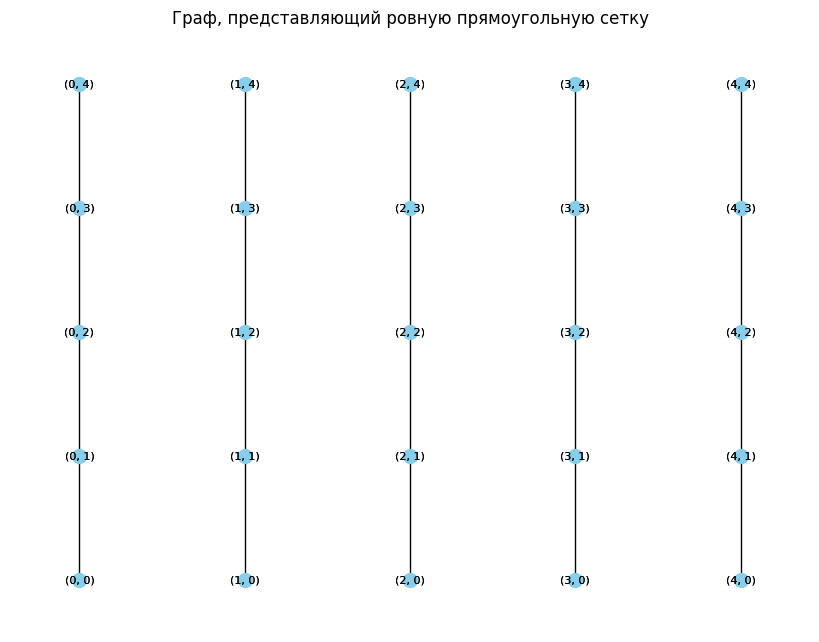

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создайте пустой граф
G = nx.Graph()

# Пример меток bbox в YOLO формате (x_center, y_center, width, height)
yolo_labels = bboxes.copy()

# Преобразуйте метки в координаты центров bbox
image_width, image_height = img.shape[1], img.shape[0]  # Ширина и высота изображения
centres = [(x * image_width, y * image_height) for x, y, _, _ in yolo_labels]
# Определите размер сетки (количество вершин вдоль осей X и Y)
grid_size_x = 5
grid_size_y = 5

# Рассчитайте расстояние между вершинами по осям X и Y
step_x = image_width / (grid_size_x - 1)
step_y = image_height / (grid_size_y - 1)

# Создайте вершины в графе с учетом сетки
for i in range(grid_size_x):
    for j in range(grid_size_y):
        x_coord = i * step_x
        y_coord = j * step_y
        # Добавьте вершину и координаты центра bbox
        G.add_node((i, j), center=(x_coord, y_coord))

# Определите связи между вершинами на основе расстояния (например, по соседству)
threshold_distance = min(step_x, step_y) * 1.1  # Пороговое расстояние для связи вершин

for i in range(grid_size_x):
    for j in range(grid_size_y):
        current_node = (i, j)
        # Проверьте соседние вершины
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                neighbor_x = i + dx
                neighbor_y = j + dy
                if 0 <= neighbor_x < grid_size_x and 0 <= neighbor_y < grid_size_y:
                    neighbor_node = (neighbor_x, neighbor_y)
                    if neighbor_node != current_node:  # Исключаем текущую вершину
                        # Вычислите расстояние между вершинами
                        distance = ((G.nodes[current_node]['center'][0] - G.nodes[neighbor_node]['center'][0])**2 +
                                    (G.nodes[current_node]['center'][1] - G.nodes[neighbor_node]['center'][1])**2)**0.5
                        if distance < threshold_distance:
                            G.add_edge(current_node, neighbor_node)

# Рисование графа
pos = {node: G.nodes[node]['center'] for node in G.nodes()}  # Получение позиций вершин

plt.figure(figsize=(8, 6))  # Создание фигуры для графа
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)

# Опционально: добавление названий вершин
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Граф, представляющий ровную прямоугольную сетку")
plt.axis('off')  # Отключение осей
plt.show()  # Показать графическое представление графа

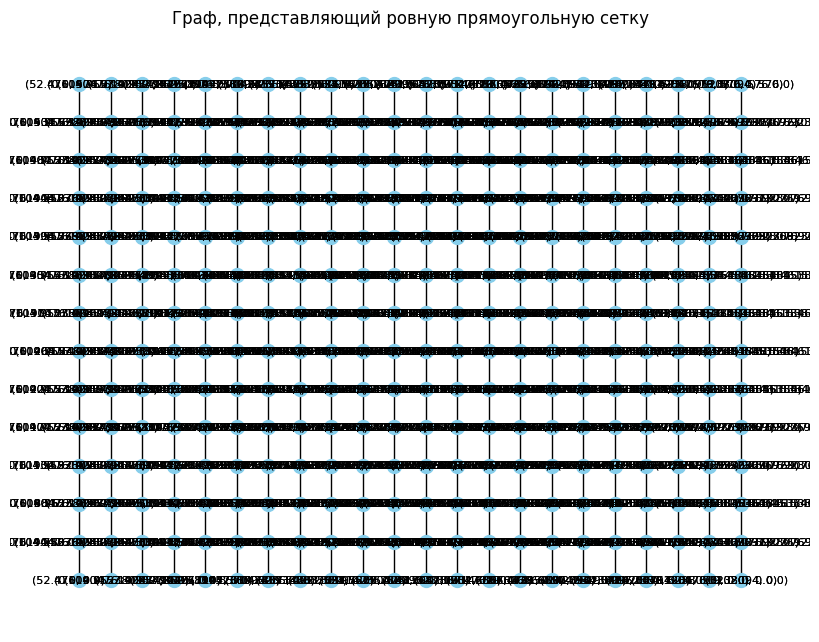

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создайте пустой граф
G = nx.Graph()

# Пример меток bbox в YOLO формате (x_center, y_center, width, height)
yolo_labels = bboxes.copy()

# Преобразуйте метки в координаты центров bbox
image_width, image_height = img.shape[1], img.shape[0]  # Ширина и высота изображения
centres = [(x * image_width, y * image_height) for x, y, _, _ in yolo_labels]

# Определите размер сетки (количество вершин вдоль осей X и Y)
grid_size_x = 22
grid_size_y = 14

# Рассчитайте расстояние между вершинами по осям X и Y
step_x = image_width / (grid_size_x - 1)
step_y = image_height / (grid_size_y - 1)

# Создайте вершины в графе с учетом сетки
for i in range(grid_size_x):
    for j in range(grid_size_y):
        x_coord = i * step_x
        y_coord = j * step_y
        # Добавьте вершину и координаты центра bbox
        G.add_node((x_coord, y_coord), center=(x_coord, y_coord))

# Определите связи между вершинами на основе расстояния (например, по соседству)
threshold_distance = min(step_x, step_y) * 1.1  # Пороговое расстояние для связи вершин

for i in range(grid_size_x):
    for j in range(grid_size_y):
        current_node = (i * step_x, j * step_y)
        # Проверьте соседние вершины
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                neighbor_x = i + dx
                neighbor_y = j + dy
                if 0 <= neighbor_x < grid_size_x and 0 <= neighbor_y < grid_size_y:
                    neighbor_node = (neighbor_x * step_x, neighbor_y * step_y)
                    if neighbor_node != current_node:  # Исключаем текущую вершину
                        # Вычислите расстояние между вершинами
                        distance = ((current_node[0] - neighbor_node[0])**2 +
                                    (current_node[1] - neighbor_node[1])**2)**0.5
                        if distance < threshold_distance:
                            G.add_edge(current_node, neighbor_node)

# Рисование графа
pos = {node: G.nodes[node]['center'] for node in G.nodes()}  # Получение позиций вершин

plt.figure(figsize=(8, 6))  # Создание фигуры для графа
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)

# Опционально: добавление названий вершин
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Граф, представляющий ровную прямоугольную сетку")
plt.axis('off')  # Отключение осей
plt.show()  # Показать графическое представление графа


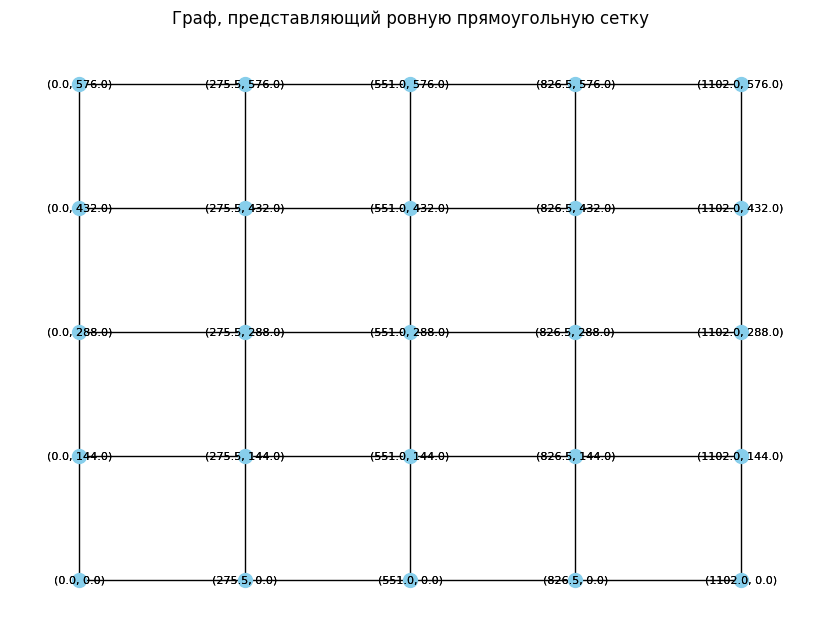

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создайте пустой граф
G = nx.Graph()

# Пример меток bbox в YOLO формате (x_center, y_center, width, height)
yolo_labels = bboxes.copy()

# Преобразуйте метки в координаты центров bbox
image_width, image_height = img.shape[1], img.shape[0]  # Ширина и высота изображения
centres = [(x * image_width, y * image_height) for x, y, _, _ in yolo_labels]

# Определите размер сетки (количество вершин вдоль осей X и Y)
grid_size_x = 5
grid_size_y = 5

# Рассчитайте расстояние между вершинами по осям X и Y
step_x = image_width / (grid_size_x - 1)
step_y = image_height / (grid_size_y - 1)

# Создайте вершины в графе с учетом сетки
for i in range(grid_size_x):
    for j in range(grid_size_y):
        x_coord = i * step_x
        y_coord = j * step_y
        # Добавьте вершину и координаты центра bbox
        G.add_node((x_coord, y_coord), center=(x_coord, y_coord))

# Создайте рёбра, соединяющие соседние вершины по горизонтали и вертикали
for i in range(grid_size_x):
    for j in range(grid_size_y):
        current_node = (i * step_x, j * step_y)
        # Соедините соседние вершины по горизонтали
        if i < grid_size_x - 1:
            neighbor_node = ((i + 1) * step_x, j * step_y)
            G.add_edge(current_node, neighbor_node)
        # Соедините соседние вершины по вертикали
        if j < grid_size_y - 1:
            neighbor_node = (i * step_x, (j + 1) * step_y)
            G.add_edge(current_node, neighbor_node)

# Рисование графа
pos = {node: G.nodes[node]['center'] for node in G.nodes()}  # Получение позиций вершин

plt.figure(figsize=(8, 6))  # Создание фигуры для графа
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)

# Опционально: добавление названий вершин
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Граф, представляющий ровную прямоугольную сетку")
plt.axis('off')  # Отключение осей
plt.show()  # Показать графическое представление графа


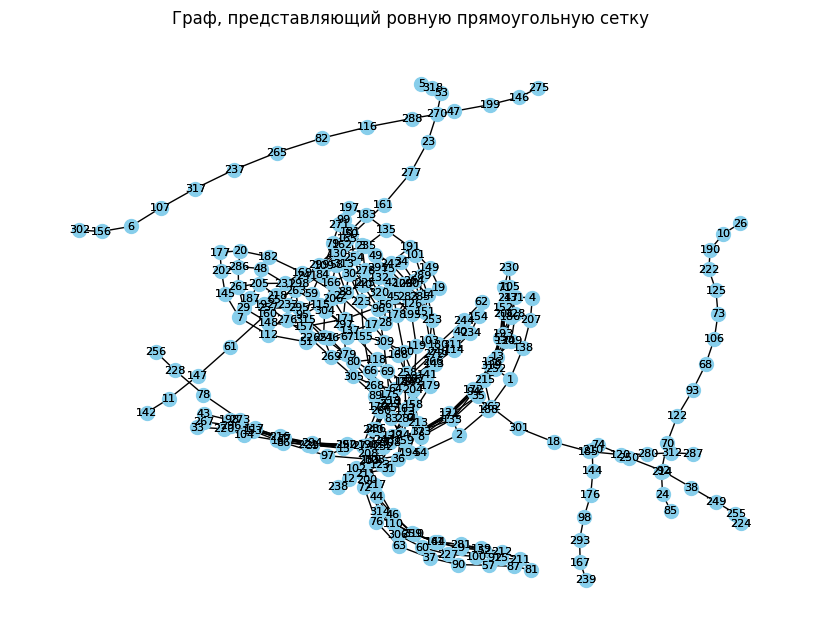

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создайте пустой граф
G = nx.Graph()

# Пример меток bbox в YOLO формате (x_center, y_center, width, height)
yolo_labels = bboxes.copy()

# Преобразуйте метки в координаты центров bbox
image_width, image_height = img.shape[1], img.shape[0]  # Ширина и высота изображения
centres = [(x * image_width, y * image_height) for x, y, _, _ in yolo_labels]

# Создайте вершины в графе для центров bbox
for idx, center in enumerate(centres):
    G.add_node(idx, center=center)

# Определите связи между вершинами на основе расстояния (например, на основе близости)
threshold_distance = 50.0  # Пороговое расстояние для связи вершин

for i in range(len(centres)):
    for j in range(i + 1, len(centres)):
        center1 = centres[i]
        center2 = centres[j]
        distance = ((center1[0] - center2[0])**2 + (center1[1] - center2[1])**2)**0.5
        if distance < threshold_distance:
            G.add_edge(i, j)

# Раскладываем граф для придания ему формы сетки
pos = nx.spring_layout(G, seed=42)  # Можете использовать также shell_layout или другой алгоритм

# Рисование графа
plt.figure(figsize=(8, 6))  # Создание фигуры для графа
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)

# Опционально: добавление названий вершин
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Граф, представляющий ровную прямоугольную сетку")
plt.axis('off')  # Отключение осей
plt.show()  # Показать графическое представление графа


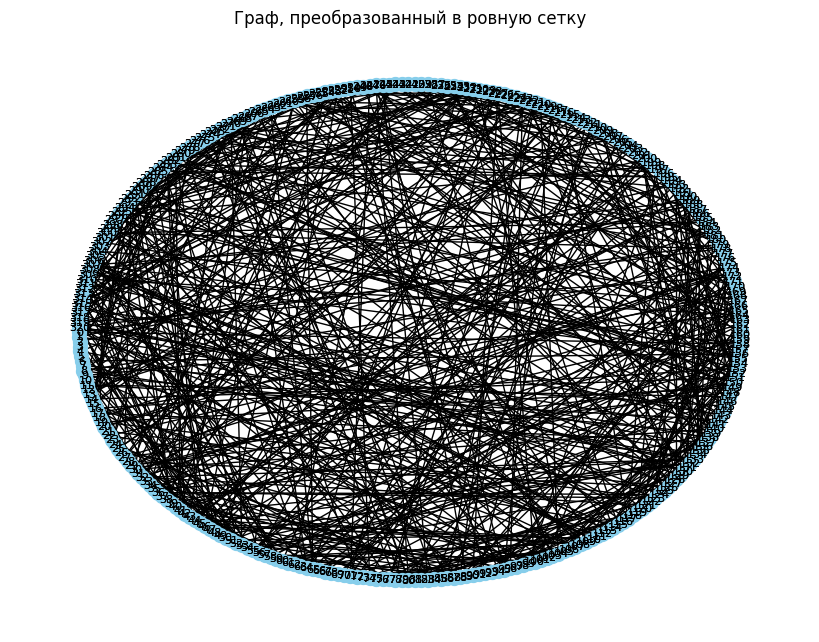

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создайте граф и добавьте вершины и рёбра (как в предыдущем коде)

# Вычисление минимального остовного дерева (MST)
mst = nx.minimum_spanning_tree(G)

# Раскладка графа в виде ровной сетки (shell layout)
pos = nx.shell_layout(mst)

# Рисование графа
plt.figure(figsize=(8, 6))  # Создание фигуры для графа
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)

# Опционально: добавление названий вершин
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Граф, преобразованный в ровную сетку")
plt.axis('off')  # Отключение осей
plt.show()  # Показать графическое представление графа


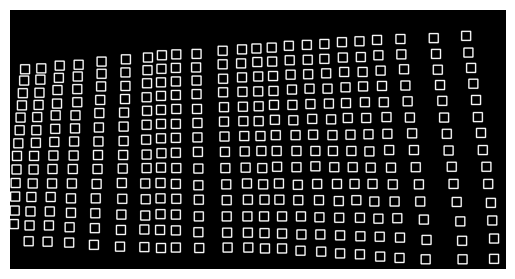

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Пример меток bbox в YOLO формате (x_center, y_center, width, height)
yolo_labels = bboxes.copy()

# Преобразуйте метки в координаты центров bbox
image_width, image_height = img.shape[1], img.shape[0]  # Ширина и высота изображения
centres = [(x * image_width, y * image_height) for x, y, _, _ in yolo_labels]

# Создайте пустой граф
G = nx.Graph()

# Добавьте вершины в граф на основе координат центров окон
for idx, center in enumerate(centres):
    G.add_node(idx, center=center)

# Определите расстояние для выравнивания вершин графа
alignment_distance = 30.0  # Произвольное расстояние для примера

# Выровняйте вершины графа
for i in range(len(centres)):
    for j in range(i + 1, len(centres)):
        center1 = centres[i]
        center2 = centres[j]
        distance = ((center1[0] - center2[0])**2 + (center1[1] - center2[1])**2)**0.5
        if distance < alignment_distance:
            G.add_edge(i, j)

# Определите пороговое значение для построения прямоугольной сетки
grid_threshold = 10.0  # Произвольное пороговое значение для примера

# Создайте пустое изображение для визуализации выровненной сетки
aligned_image = np.zeros_like(img)

# Пройдите по вершинам графа и нарисуйте окна на изображении
for node in G.nodes():
    x, y = centres[node]
    cv2.rectangle(aligned_image, (int(x - grid_threshold), int(y - grid_threshold)),
                  (int(x + grid_threshold), int(y + grid_threshold)), (255, 255, 255), thickness=2)

# Визуализируйте изображение с выровненными окнами
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


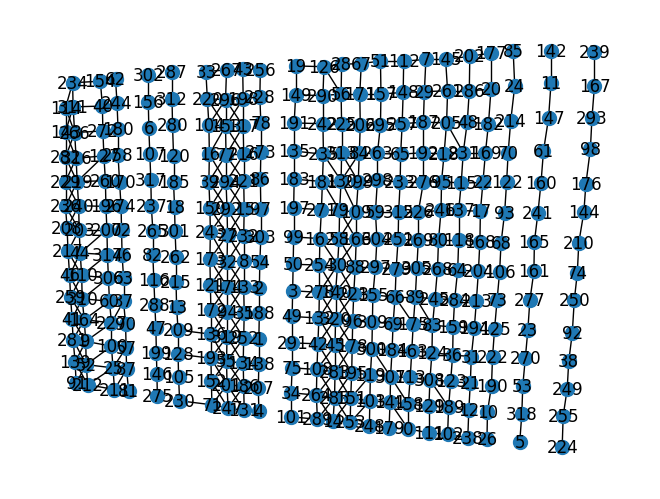

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load your YOLO labels (bboxes) and image
yolo_labels = bboxes.copy()  # Replace with your YOLO labels
 # Replace with your image file

# Step 1: Convert YOLO labels to window coordinates
image_width, image_height = img.shape[1], img.shape[0]
window_coordinates = [(int((x - w / 2) * image_width), int((y - h / 2) * image_height),
                      int((x + w / 2) * image_width), int((y + h / 2) * image_height))
                     for x, y, w, h in yolo_labels]

# Step 2: Create a graph from window coordinates
G = nx.Graph()

# Add nodes (windows) to the graph
for i, (x1, y1, x2, y2) in enumerate(window_coordinates):
    G.add_node(i, x1=x1, y1=y1, x2=x2, y2=y2)

# Add edges based on proximity (you can define your criteria for proximity)
# For example, you can add an edge if the centers are close enough
for i in range(len(window_coordinates)):
    for j in range(i + 1, len(window_coordinates)):
        center_i = ((window_coordinates[i][0] + window_coordinates[i][2]) / 2,
                    (window_coordinates[i][1] + window_coordinates[i][3]) / 2)
        center_j = ((window_coordinates[j][0] + window_coordinates[j][2]) / 2,
                    (window_coordinates[j][1] + window_coordinates[j][3]) / 2)

        # Add an edge if the centers are close enough (you can define a threshold)
        threshold = 50  # Adjust this threshold as needed
        if np.linalg.norm(np.array(center_i) - np.array(center_j)) < threshold:
            G.add_edge(i, j)

# Step 3: Perform graph analysis, edge alignment, angle correction, rectangularization, and numbering (follow previous response for details)

# Step 4: Visualize the results (you can add this at the end of your code)
pos = {i: (node['x1'], node['y1']) for i, node in G.nodes(data=True)}
nx.draw(G, pos, with_labels=True, node_size=100)
plt.show()



# выделение вертикальных *швов*

In [ ]:
src = cv2.imread('/content/0000000111building.jpg')

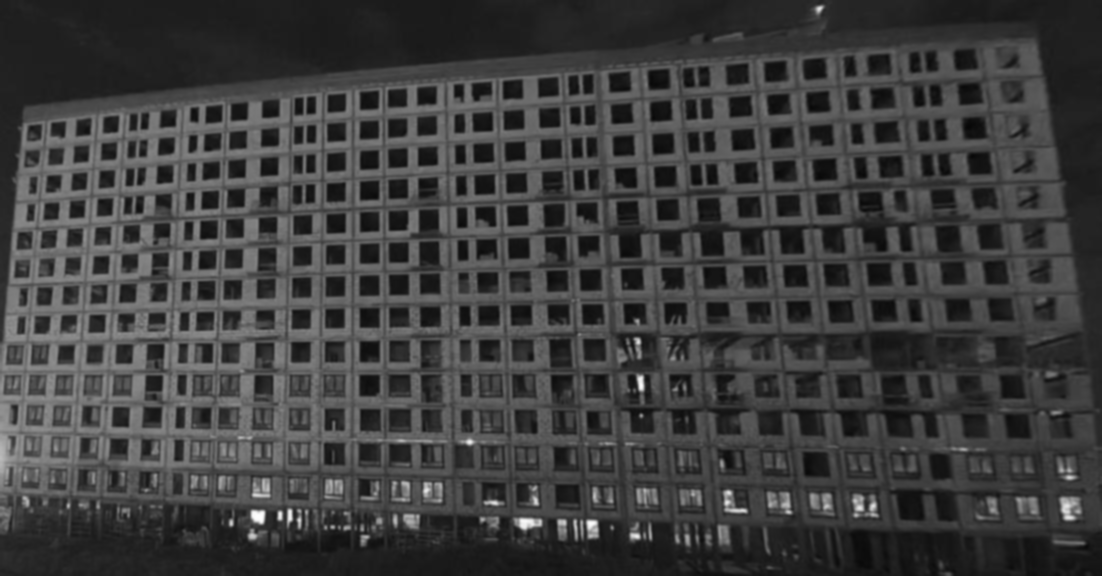

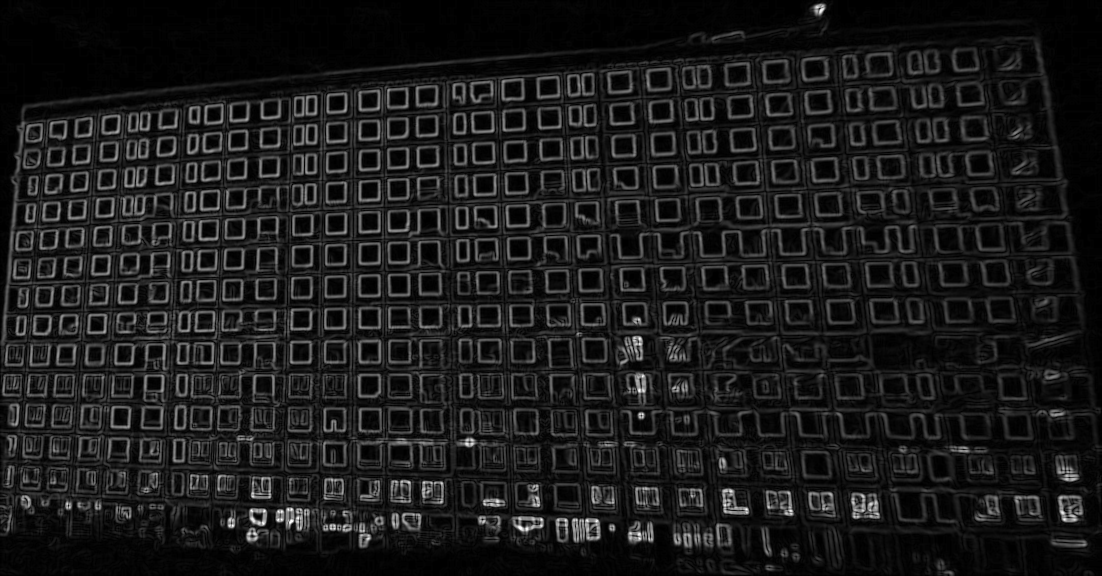

In [ ]:
from cv2.gapi import CV_POINT2F
scale = 1
delta = 0
ddepth = cv2.CV_16S
src =cv2.GaussianBlur(src, (3, 3), 0)


gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

cv2_imshow(src)
# cv2_imshow(abs_grad_x)
cv2_imshow(grad)


find contours

find contours from orig image

In [ ]:

imgray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
max_x = max_y = 0
height, width = grad.shape
min_x, min_y = width, height
# computes the bounding box for the contour, and draws it on the frame,
for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    min_x, max_x = min(x, min_x), max(x+w, max_x)
    min_y, max_y = min(y, min_y), max(y+h, max_y)
    # if w > 80 and h > 80:
    cv2.rectangle(src, (x,y), (x+w,y+h), (255, 0, 0), 2)

# if max_x - min_x > 0 and max_y - min_y > 0:
#     cv2.rectangle(src, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)

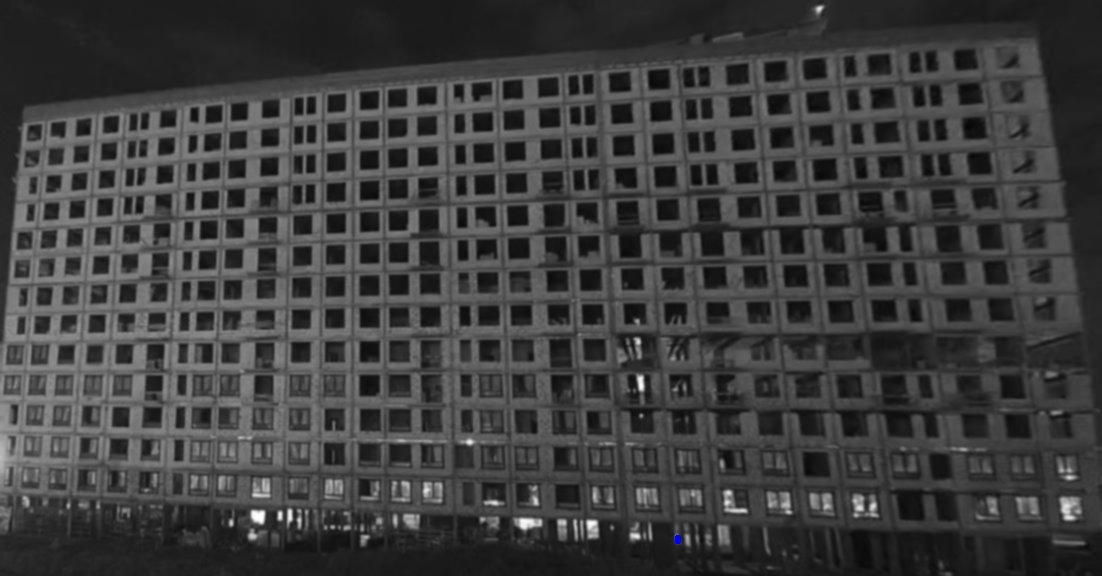

In [ ]:
cv2_imshow(src)

find contours from sobel

In [ ]:
contours, hierarchy = cv2.findContours(grad, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
try: hierarchy = hierarchy[0]
except: hierarchy = []

height, width = grad.shape
min_x, min_y = width, height
max_x = max_y = 0

# computes the bounding box for the contour, and draws it on the frame,
for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    min_x, max_x = min(x, min_x), max(x+w, max_x)
    min_y, max_y = min(y, min_y), max(y+h, max_y)
    if w > 80 and h > 80:
        cv2.rectangle(src, (x,y), (x+w,y+h), (255, 0, 0), 2)

if max_x - min_x > 0 and max_y - min_y > 0:
    cv2.rectangle(src, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)

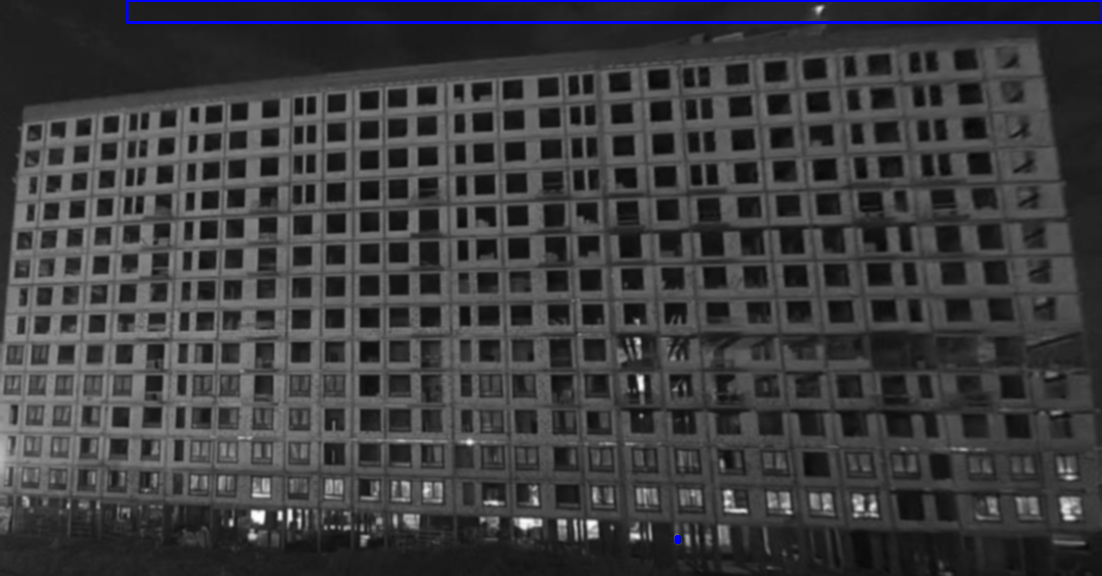

In [ ]:
cv2_imshow(src)

# Quantization

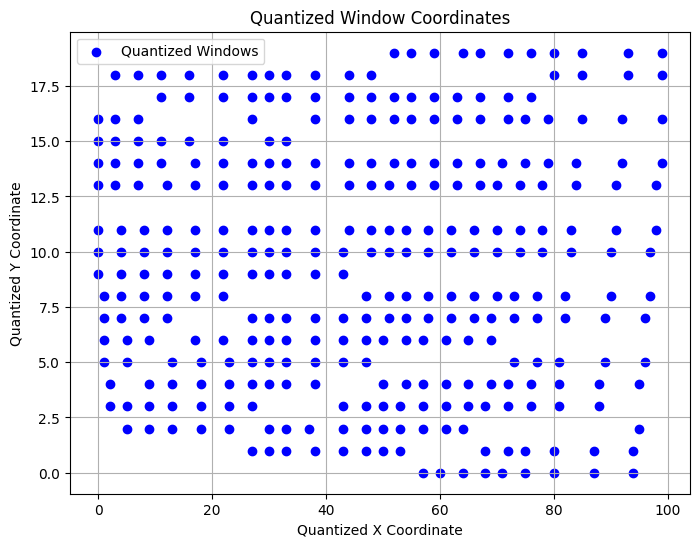

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Прочитайте координаты ограничительных рамок из файла
with open('/content/drive/MyDrive/urbanhack-train/labels_clean/0000000111building.txt') as f:
    lines = f.readlines()

bboxes = []
for line in lines:
    line = np.array(line.split()[1:]).astype(float)
    bboxes.append(line)

# Извлеките x и y координаты из ограничительных рамок
coordinates = np.array(bboxes)[:, :2]

# Определите количество бинов для квантования
n_bins_x = 100 # Подстройте это значение в зависимости от вашего изображения и требований
n_bins_y = 20

# Создайте экземпляры KBinsDiscretizer для x и y координат
est_x = KBinsDiscretizer(n_bins=n_bins_x, encode='ordinal', strategy='uniform')
est_y = KBinsDiscretizer(n_bins=n_bins_y, encode='ordinal', strategy='uniform')

# Обучите и преобразуйте x и y координаты отдельно
quantized_x = est_x.fit_transform(coordinates[:, 0].reshape(-1, 1))
quantized_y = est_y.fit_transform(coordinates[:, 1].reshape(-1, 1))

# Совместите квантованные x и y координаты в одну матрицу
quantized_coordinates = np.column_stack((quantized_x, quantized_y))

# Визуализируйте квантованные координаты
plt.figure(figsize=(8, 6))
plt.scatter(quantized_coordinates[:, 0], quantized_coordinates[:, 1], marker='o', c='blue', label='Quantized Windows')
plt.xlabel('Quantized X Coordinate')
plt.ylabel('Quantized Y Coordinate')
plt.title('Quantized Window Coordinates')
plt.grid(True)
plt.legend()
plt.show()

#23 - подъезда x 14 этажей


# KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


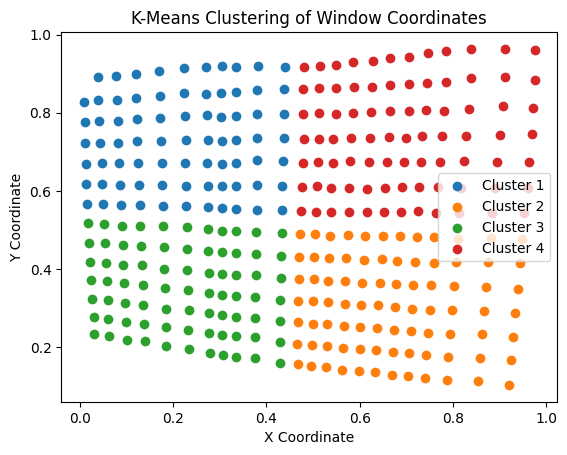

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans


# Прочитайте координаты ограничительных рамок из файла
with open('/content/drive/MyDrive/urbanhack-train/labels_clean/0000000111building.txt') as f:
    lines = f.readlines()

bboxes = []
for line in lines:
    line = np.array(line.split()[1:]).astype(float)
    bboxes.append(line)

# Извлеките x и y координаты из ограничительных рамок
coordinates = np.array(bboxes)[:, :2]


# Подготовка данных (coordinates - ваш массив с координатами)
data = np.array(coordinates)

# Создание и обучение модели KNN
k = 4  # Пример: выберите желаемое количество соседей
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt

# Разделяйте точки по кластерам и отображайте их разными цветами
for i in range(k):
    plt.scatter(data[cluster_labels == i][:, 0], data[cluster_labels == i][:, 1], label=f'Cluster {i+1}')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('K-Means Clustering of Window Coordinates')
plt.legend()
plt.show()